In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pygam import LinearGAM
from sklearn.metrics import mean_squared_error, median_absolute_error 
from pygam.utils import generate_X_grid
from dependencia import dependencia_parcial

sns.set_style('darkgrid')

# Desafío 1: Preparar el ambiente de trabajo
Importe los módulos clásicos del trabajo en ciencia de datos.  
El archivo tiene el nombre compresive_strength_concrete.csv . 
- Impórtelo y genere estadísticas descriptivas.
- En esta actividad su tarea será predecir la fuerza compresiva del concreto a partir de las medidas en la mezcla, para esto, utilice un modelo aditivo generalizado de la librería pyGAM .

In [2]:
df = pd.read_csv('compresive_strength_concrete.csv')

In [3]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Desafío 2: Descripción
- El vector objetivo tiene el nombre de **Concrete compressive strength(MPa, megapascals)**
- Los nombres de las variables son muy poco amigables, dado que contienen espacios, paréntesis y otros elementos difíciles de referenciar. Se sugiere (pero no se obliga) renombrar las variables o acceder a éstas mediante notación de índice .
- Inspeccione el tipo de datos de la base de datos, fijándose en su naturaleza y distribución. Decida si es necesario normalizarlos/escalarlos.

In [4]:
df.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 
              'superplasticizer', 'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_comprenssive_strength']

In [5]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_comprenssive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                            1030 non-null float64
blast_furnace_slag                1030 non-null float64
fly_ash                           1030 non-null float64
water                             1030 non-null float64
superplasticizer                  1030 non-null float64
coarse_aggregate                  1030 non-null float64
fine_aggregate                    1030 non-null float64
age                               1030 non-null int64
concrete_comprenssive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_comprenssive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


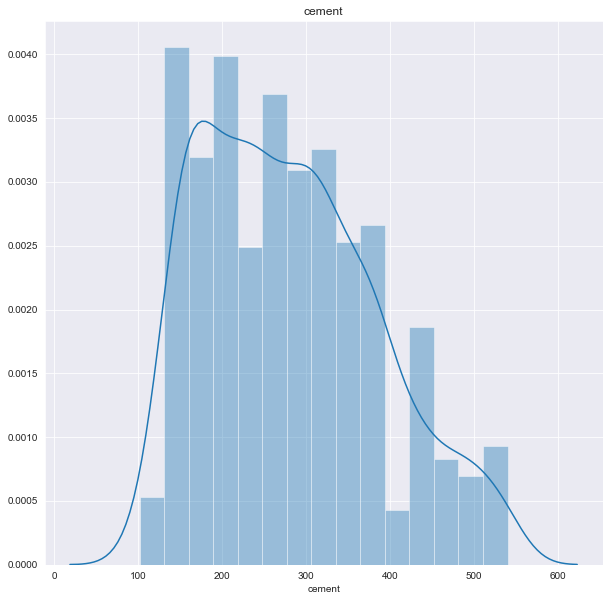

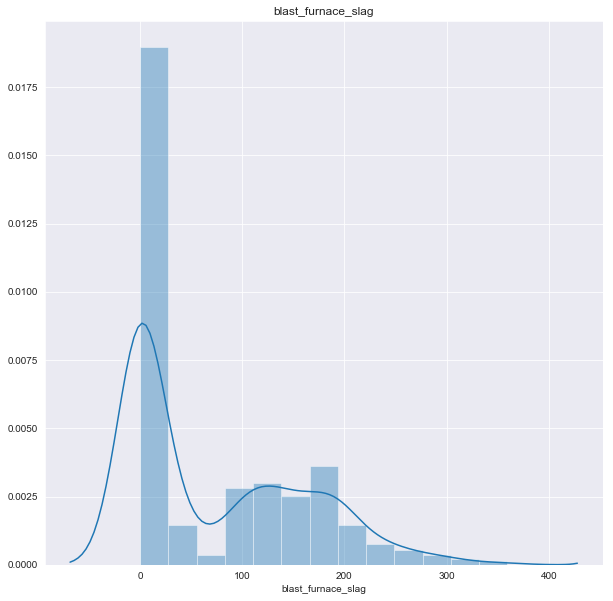

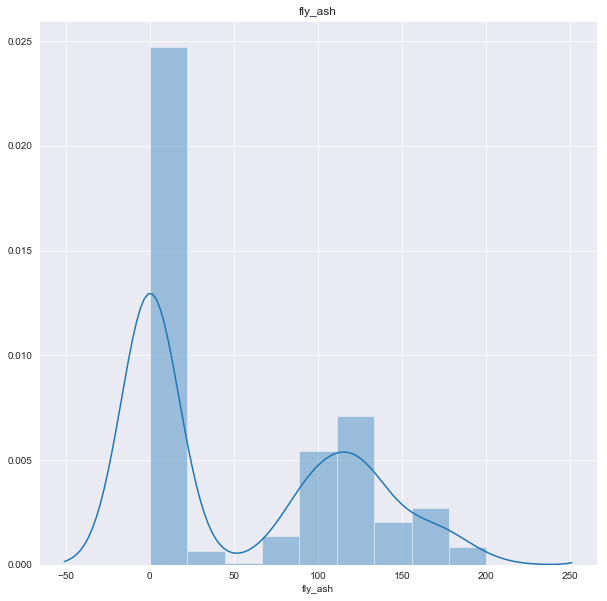

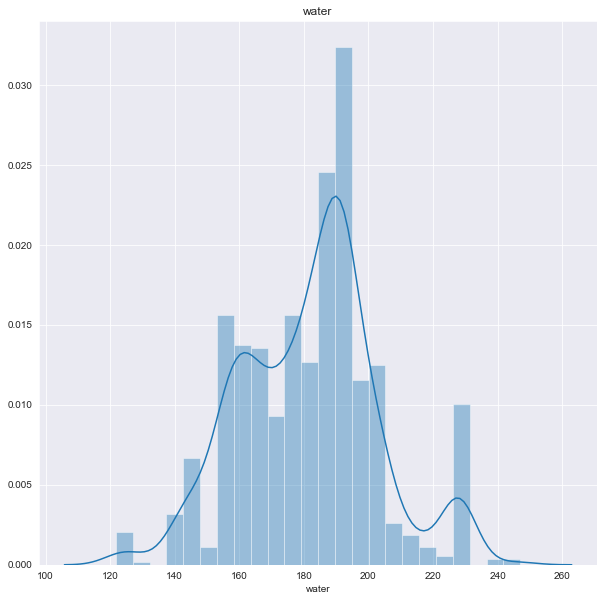

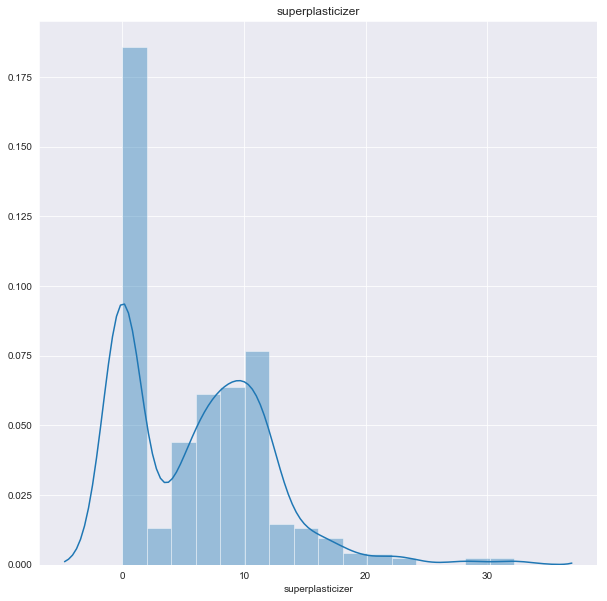

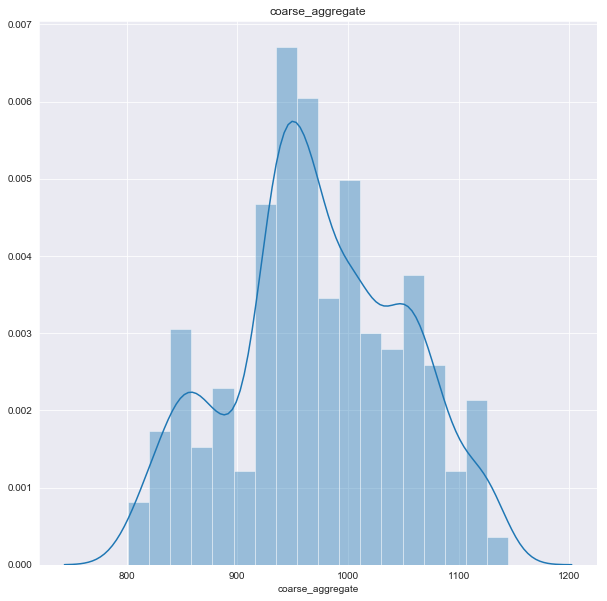

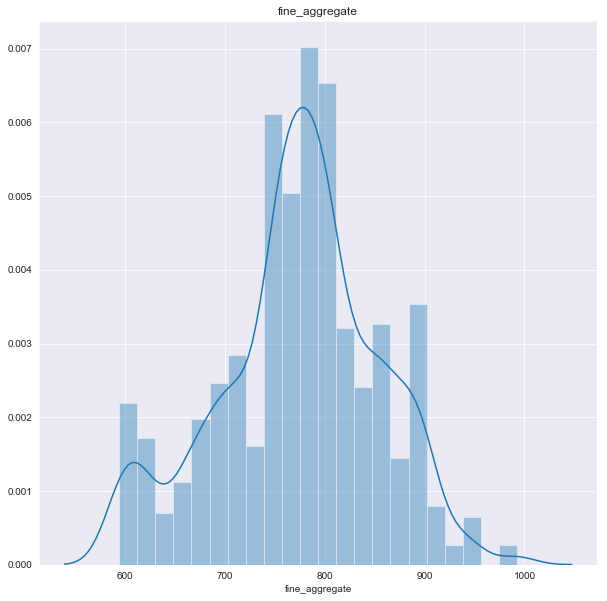

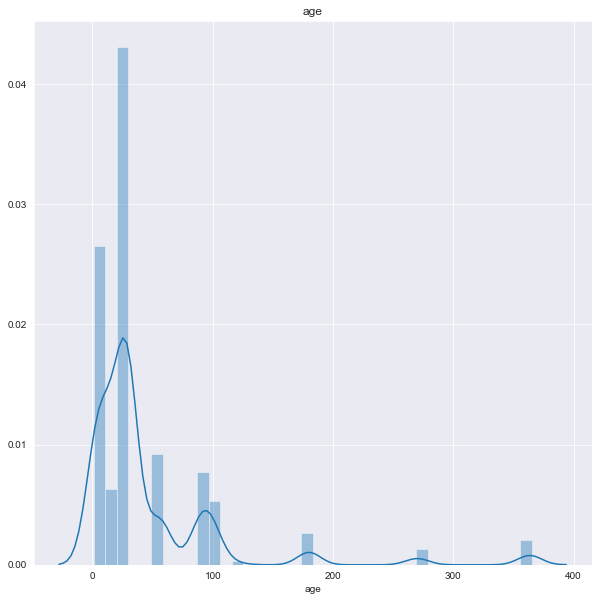

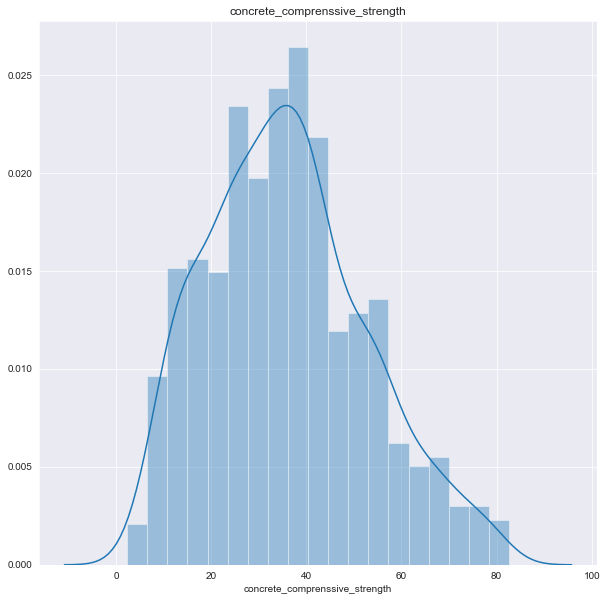

In [8]:
for column in df:
    plt.figure(figsize=(10,10))
    plt.title(column)
    sns.distplot(df[column])

Normalizamos las variables

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


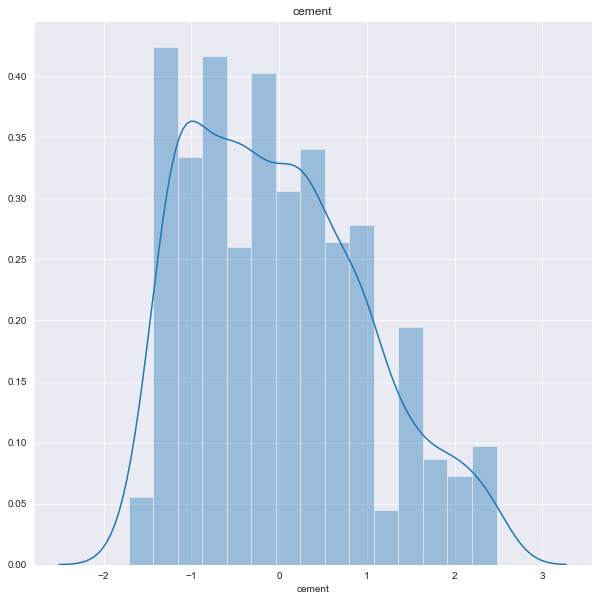

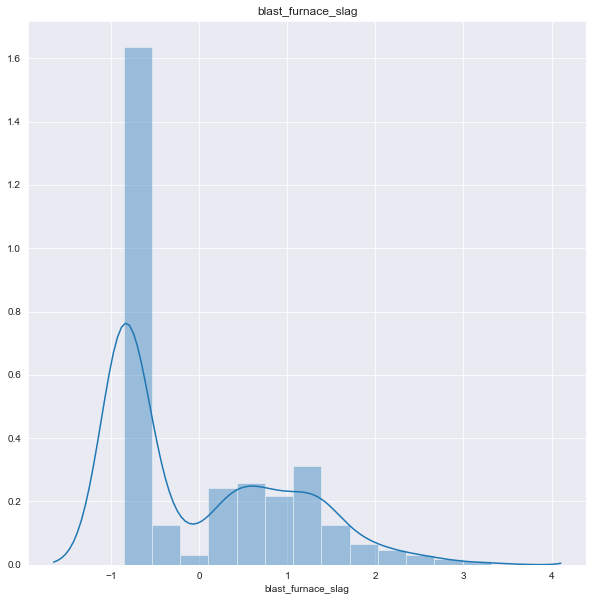

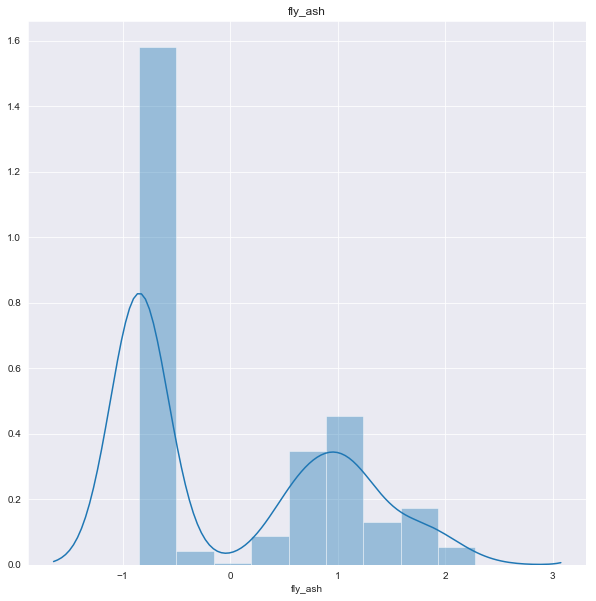

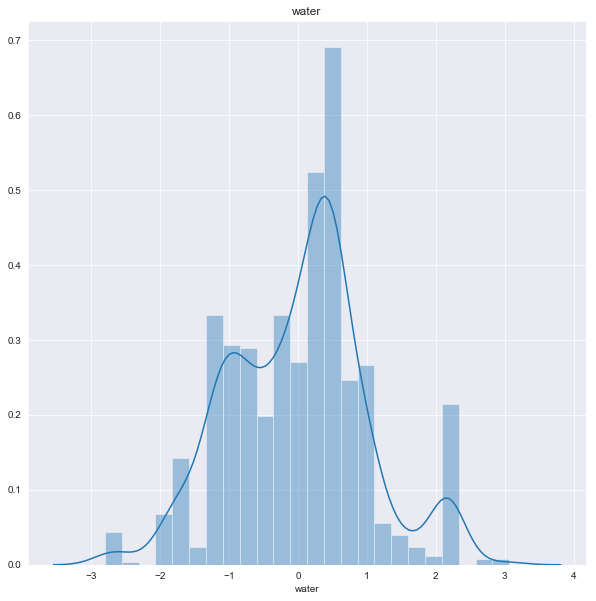

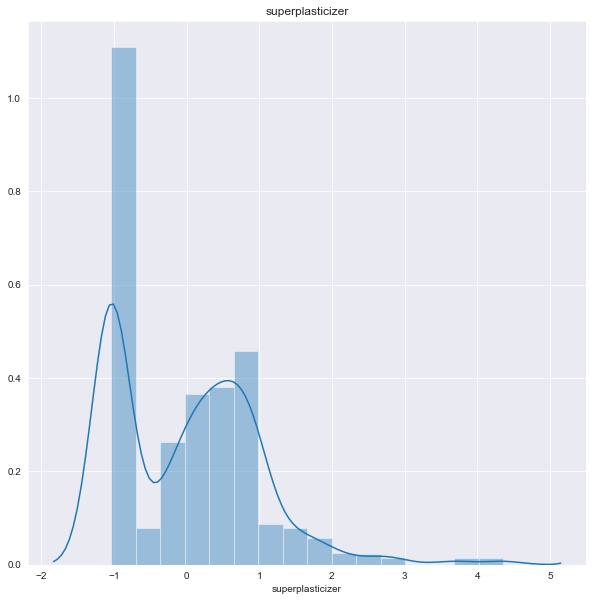

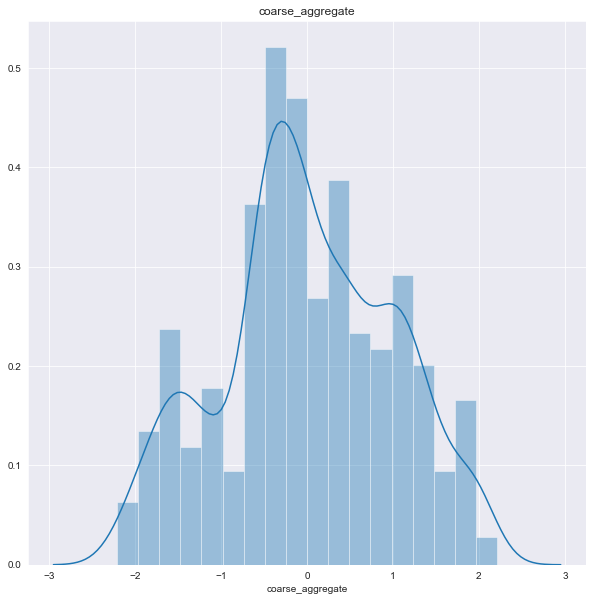

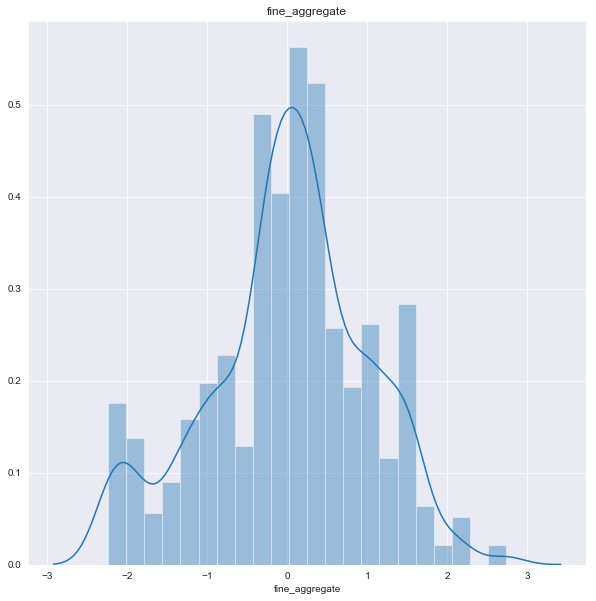

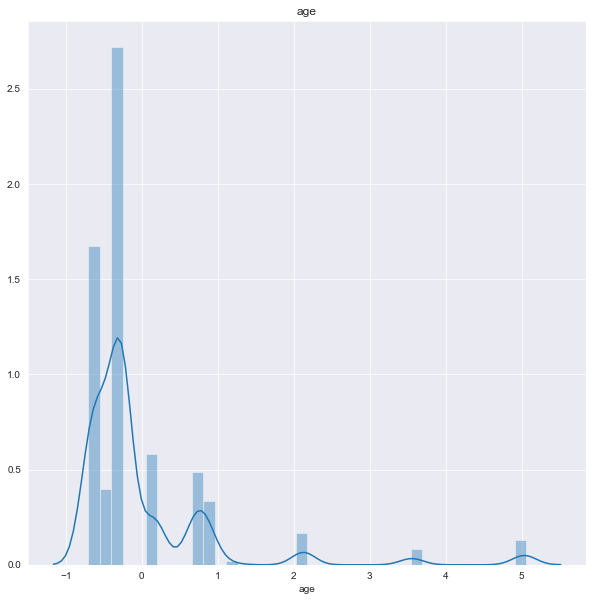

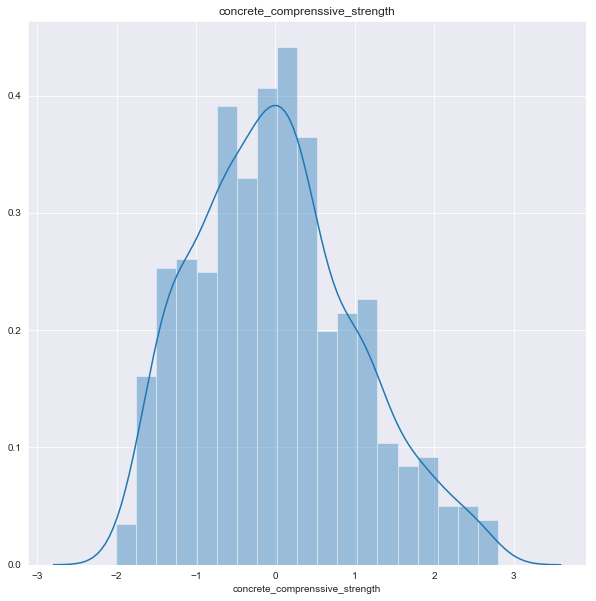

In [10]:
for column in df:
    plt.figure(figsize=(10,10))
    plt.title(column)
    sns.distplot(df_scaled[column])

# Desafío 3: Modelo
- En base al vector objetivo, decida el mejor modelo e impórtelo con pygam . Condicional a ésto, importe las métricas de desempeño asociadas.
- Genere conjuntos de entrenamiento y validación.
- Genere un primer modelo sin implementar la función GridSeach. Repórte el hiperparámetro lam así como las métricas de desempeño asociadas.
- Genere un segundo modelo implementando gridsearch en lambda con un logspace entre -3 y 3. Comente sobre el mejor hiperparámetro y sus métricas de desempeño.

In [11]:
X = df_scaled.iloc[:, :-1] 
N = X.shape[0] # guardamos el número de filas (datos de entrenamiento)
X.insert(X.shape[1], 'intercept', np.ones(N)) #Se crea una columna nueva dentro de las variables predictoras llamada 'intecept'
y = df['concrete_comprenssive_strength'] # asignamos como target la variable 'price'


In [12]:
X.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,intercept
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733,1.0
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733,1.0
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066,1.0
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677,1.0
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487,1.0


In [13]:
X_train, X_test, y_train, y_test,  = train_test_split(X, y, test_size = 0.3, random_state = 64)

In [14]:
linear_gam = LinearGAM().fit(X_train, y_train)


In [15]:
linear_gam.lam

0.6

In [16]:
print('Lambda sin GridSearch:',str(linear_gam.lam))
print('MSE sin GridSearch:',str(mean_squared_error(linear_gam.predict(X_test),y_test)))
print('MAE sin GridSearch:',str(median_absolute_error(linear_gam.predict(X_test),y_test)))

Lambda sin GridSearch: 0.6
MSE sin GridSearch: 28.469006834112744
MAE sin GridSearch: 3.658347990537166


### Utilizamos GridSearch

In [17]:
search_params = {'lam': np.logspace(-3, 3, 11)}

gam = LinearGAM().gridsearch(X_train, y_train, **search_params)

100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [18]:
print('Lambda con GridSearch:',str(gam.lam))
print('MSE con GridSearch:',str((mean_squared_error(gam.predict(X_test),y_test))))
print('MAE con GridSearch:',str(median_absolute_error(gam.predict(X_test),y_test)))

Lambda con GridSearch: 1.0
MSE con GridSearch: 28.610320443096562
MAE con GridSearch: 3.6746294751207778



En este caso, el mejor modelo es aquel con lambda 0,6 y no aquel que ocupamos GridSearch

# Desafío 4: Dependencia Parcial
- En base al mejor modelo, reporte el comportamiento de la dependencia parcial de cada atributo.
- Para ello, genere una función que tenga como argumento de entrada el modelo estimado y devuelva una grilla con todos los gráficos de dependencia parcial.
- Reporte brevemente sobre qué atributos están asociados a mayores y menores. niveles de resistencia.

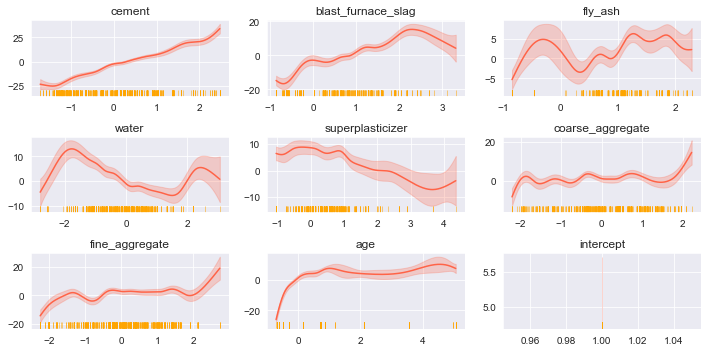

In [19]:
dependencia_parcial(gam,X_train)

- **Cement:** Hay una relación clara entre más concreto, mayor fuerza de compresión
- **blast_furnace_slag:** También hay una relación directa a la variable objetivo
- **fly_ash:** Esta variable tiene una mayor incertidumbre que las otras variables, pero se puede inferir un comportamiento proporcional directo hasta que la variable alcanza valores superiores a 1 (normalizada), donde se vuelve más o mens constante
-  **water:** Presenta un comportamiento inversamente proporcional
- **superplasticizer:** Tiene un comportamiento relativamenteestable entre -1 y 1, sin embargo luego comienza a presentar un comportamiento asociado a un menor nivel de resistencia, *sin embargo* hay que notar que sobre estos valores tenemos menores puntos en la muestra, lo que aumenta la incertidumbre de la predicción
- **coarse aggregate:** se mantiene relativamente estable sin afectar la variable objetivo
- **fin_aggregate:** también se mantiene estable sin afectar la variable objetivo
- **age** en valores bajos, disminuye la fuerza de compresión, sin embargo pasado el valor 1 se comienza a estabilizar